<a href="https://colab.research.google.com/github/n-goyal/Python_Projects/blob/master/Tensorflow/Tensorflow_mnist_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [4]:
tf.__version__

'1.12.0'

### MNIST - Digit

In [0]:
mnist = tf.keras.datasets.mnist ## using keras api from the beginning itself, lol

In [0]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [0]:
#Normalization
train_x, test_x = train_x/255.0, test_x/255.0

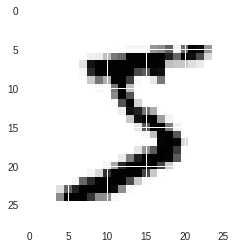

In [13]:

plt.imshow(train_x[0]) #Basic check

In [0]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation = tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.2011 - acc: 0.9412
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0808 - acc: 0.9750
Epoch 3/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.0535 - acc: 0.9833
Epoch 4/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0390 - acc: 0.9876
Epoch 5/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0276 - acc: 0.9912


In [19]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 1s 63us/step


[0.06438535112575627, 0.9799]

### Fashion MNIST Data

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
# getting to know each other
print("train_img_shape: ", train_img.shape)
print("test_img_shape: ", test_img.shape)
print("train_label: ", train_label.shape)
print("test_label: ", test_label.shape)

train_img_shape:  (60000, 28, 28)
test_img_shape:  (10000, 28, 28)
train_label:  (60000,)
test_label:  (10000,)


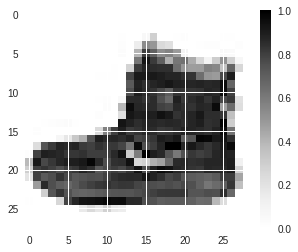

In [43]:
# preprocessing
# input normalization
train_img, test_img  = train_img / 255.0, test_img/255.0
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.show()

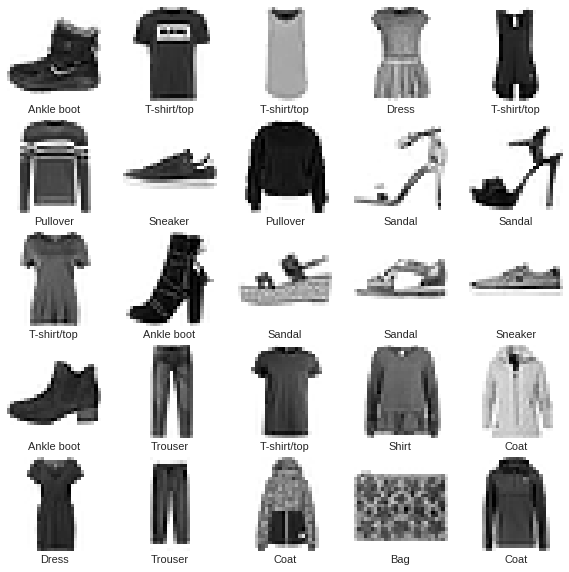

In [48]:
# displaying 25 examples with classes mentioned below them
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])


In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [53]:
model.fit(train_img, train_label, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.4931 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3746 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3368 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3127 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2932 - acc: 0.8916


In [55]:
test_loss, test_acc = model.evaluate(test_img, test_label)
print("test_accuracy: ", test_acc)

10000/10000 [==============================] - 1s 60us/step
test_accuracy:  0.8759


In [56]:
## Making predictions
predictions = model.predict(test_img)
predictions[0]

array([5.2425016e-06, 1.8630194e-06, 4.6356138e-07, 3.2615603e-08,
       2.5015154e-07, 2.6726422e-03, 9.6467818e-07, 9.1219380e-02,
       3.6979531e-05, 9.0606219e-01], dtype=float32)

In [57]:
np.argmax(predictions[0])

9

In [59]:
test_label[0]

9

In [0]:
def plot_img(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

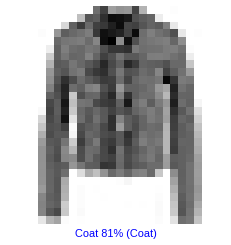

In [68]:
i = 10
plot_img(i, predictions, test_label, test_img)

In [0]:
def plot_value_arr(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  
  thisplot[true_label].set_color('blue')

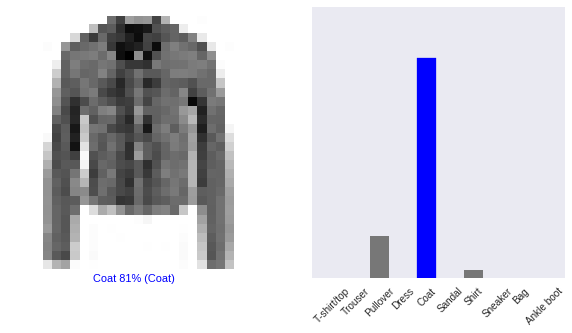

In [80]:
i = 10
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_img(i, predictions, test_label, test_img)
plt.subplot(1,2,2)
plot_value_arr(i, predictions, test_label)

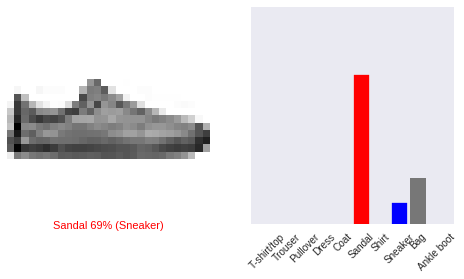

In [82]:
# similarly, say if i = 12
i = 12
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_img(i, predictions, test_label, test_img)
plt.subplot(1,2,2)
plot_value_arr(i, predictions, test_label)